In [2]:
!pip install spacy PyPDF2 docx2txt sentence-transformers
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 130.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [1]:
import spacy
import PyPDF2
import docx2txt
from sentence_transformers import SentenceTransformer, util


In [2]:
nlp = spacy.load("en_core_web_sm")
model = SentenceTransformer('all-MiniLM-L6-v2')

def extract_text(file_path):
    if file_path.endswith(".pdf"):
        with open(file_path, "rb") as f:
            reader = PyPDF2.PdfReader(f)
            text = "".join([page.extract_text() for page in reader.pages])
    elif file_path.endswith(".docx"):
        text = docx2txt.process(file_path)
    else:
        text = ""
    return text

def extract_skills(text):
    doc = nlp(text)
    keywords = [token.text.lower() for token in doc if token.pos_ in ['NOUN','PROPN']]
    return list(set(keywords))

def match_score(resume_text, job_desc):
    emb1 = model.encode(resume_text, convert_to_tensor=True)
    emb2 = model.encode(job_desc, convert_to_tensor=True)
    return float(util.pytorch_cos_sim(emb1, emb2))


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [3]:
from google.colab import files
uploaded = files.upload()


Saving marutisuzuki_resume.pdf to marutisuzuki_resume.pdf


In [4]:
file_path = list(uploaded.keys())[0]
resume_text = extract_text(file_path)
skills = extract_skills(resume_text)

job_description = """
Looking for a software engineer skilled in Python, SQL, communication, data analysis, teamwork, and Power BI.
"""

similarity = match_score(resume_text, job_description)

print("🧠 Extracted Skills:", skills)
print("\n🎯 Similarity Score with Job Role:", round(similarity * 100, 2), "%")

required_skills = ['python', 'sql', 'communication', 'data analysis', 'teamwork', 'power bi']
missing_skills = [s for s in required_skills if s not in skills]
print("\n⚠️ Missing Skills:", missing_skills)


🧠 Extracted Skills: ['certifications', 'platform', 'application', 'html', 'cbse)2020', 'authentication', 'queries', 'iter', '%', '•java', 'office', 'coding', 'choudhury', 'problem', 'pcmb', 'certification', 'soumya', 'software', 'feedback', 'insights', 'technical', 'programming', 'validation', 'innovation', 'workflows', 'manipulation', 'values', 'rating', 'level', 'duplicates', 'management', 'java', 'ranjan', 'projects', 'public', 'performance', 'cup', 'teamwork', 'exception', 'sales', 'represented', 'bhubaneswar2022', 'cbse)2022', 'outliers', 'indexing', 'basics', 'subqueries', 'event', 'system', 'analysis', 'soa', 'student', 'operations', 'seminar', 'vs', 'computer', 'state', 'power', 'crud', 'star', 'concepts', 'mance', 'employee', 'hr', 'dbms', 'online', 'kaggle', 'visualization', 'core', '+91', 'excel', 'mysql', 'joins', 'summary', 'cgpa', 'achievements', 'automation', 'lexmark', 'query', 'university', 'sales)python', 'retrieval', 'ambitious', 'session', 'sql', 'culture', 'siksha'

In [5]:
# --- SMART FEEDBACK SYSTEM ---

def give_feedback(similarity, missing_skills):
    feedback = ""

    # Base feedback based on similarity score
    if similarity >= 0.85:
        feedback += "✅ Excellent! Your resume strongly aligns with the job description.\n"
    elif similarity >= 0.65:
        feedback += "⚙️ Good match. You meet most requirements but can improve further.\n"
    else:
        feedback += "📄 Your resume needs more skill alignment for this role.\n"

    # Add missing skills section
    if missing_skills:
        feedback += f"\n⚠️ Missing or Weak Skills Detected: {', '.join(missing_skills)}\n"
        feedback += "Here are some resources to strengthen them:\n"

        # Suggest resources dynamically
        study_resources = {
            "python": "➡️ https://www.w3schools.com/python/ or https://www.freecodecamp.org/learn/python/",
            "sql": "➡️ https://www.w3schools.com/sql/ or https://mode.com/sql-tutorial/",
            "communication": "➡️ https://www.coursera.org/learn/wharton-communication-skills",
            "data analysis": "➡️ https://www.kaggle.com/learn/data-analysis or https://www.coursera.org/specializations/data-analysis",
            "teamwork": "➡️ https://www.mindtools.com/azgh7ek/teamwork-skills",
            "power bi": "➡️ https://learn.microsoft.com/en-us/power-bi/learning-catalog/ or https://www.udemy.com/course/microsoft-power-bi-up-running-with-power-bi-desktop/",
            "excel": "➡️ https://www.coursera.org/learn/excel-data-analysis",
            "machine learning": "➡️ https://www.coursera.org/learn/machine-learning or https://www.kaggle.com/learn/intro-to-machine-learning"
        }

        for skill in missing_skills:
            if skill in study_resources:
                feedback += f"📘 {skill.title()}: {study_resources[skill]}\n"
            else:
                feedback += f"📗 {skill.title()}: Search on Google or YouTube for best courses.\n"
    else:
        feedback += "\n🌟 No major missing skills detected. Your profile looks well-rounded!"

    return feedback


# --- Generate final feedback ---
feedback_msg = give_feedback(similarity, missing_skills)
print("\n💬 FEEDBACK SUMMARY:\n")
print(feedback_msg)



💬 FEEDBACK SUMMARY:

📄 Your resume needs more skill alignment for this role.

⚠️ Missing or Weak Skills Detected: communication, data analysis, power bi
Here are some resources to strengthen them:
📘 Communication: ➡️ https://www.coursera.org/learn/wharton-communication-skills
📘 Data Analysis: ➡️ https://www.kaggle.com/learn/data-analysis or https://www.coursera.org/specializations/data-analysis
📘 Power Bi: ➡️ https://learn.microsoft.com/en-us/power-bi/learning-catalog/ or https://www.udemy.com/course/microsoft-power-bi-up-running-with-power-bi-desktop/



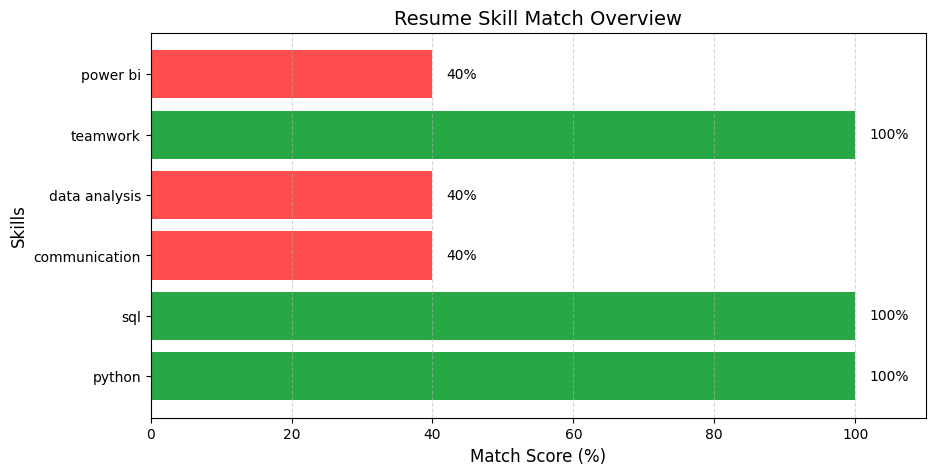

In [8]:
import matplotlib.pyplot as plt

# --- Skill Match Visualization ---
def visualize_skill_match(required_skills, extracted_skills):
    skills = []
    scores = []

    for skill in required_skills:
        skills.append(skill)
        if skill in extracted_skills:
            scores.append(100)
        else:
            scores.append(40)  # Partial/Not found — low score

    # Create bar chart
    plt.figure(figsize=(10,5))
    plt.barh(skills, scores, color=['#28a745' if s == 100 else '#ff4d4d' for s in scores])
    plt.title("Resume Skill Match Overview", fontsize=14)
    plt.xlabel("Match Score (%)", fontsize=12)
    plt.ylabel("Skills", fontsize=12)
    plt.xlim(0, 110)

    # Add score labels
    for i, v in enumerate(scores):
        plt.text(v + 2, i, f"{v}%", color='black', va='center')

    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()

# --- Run Visualization ---
visualize_skill_match(required_skills, skills)


In [9]:
with open("resume_feedback.txt", "w") as f:
    f.write(feedback_msg)
print("\n✅ Feedback saved to 'resume_feedback.txt'")



✅ Feedback saved to 'resume_feedback.txt'


In [10]:
from google.colab import files
files.download("resume_feedback.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>